In [29]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib as plt
from datetime import date

In [30]:
data = pd.read_csv('../data/dax_indicator_2000_2024.csv')
data.head()

,Date,open,high,low,close,adj_close,volume,direction_num,direction,adj_diff,...,pos_BBU_3_2.0,pos_BBP_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBP_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0,pos_BBP_14_2.0
0,2000-02-18,7584.390137,7658.879883,7543.500000,7573.779785,7573.779785,52728400,-10.610352,0,0.0,...,1,0,0,1,1,0,0,0,1,0
1,2000-02-21,7568.339844,7590.529785,7447.709961,7590.529785,7590.529785,24404000,22.189941,1,0.0,...,1,0,0,0,1,0,0,0,1,0
2,2000-02-22,7580.379883,7725.500000,7540.359863,7607.939941,7607.939941,51082700,27.560059,1,0.0,...,0,0,0,0,1,0,0,0,1,0
3,2000-02-23,7619.830078,7772.279785,7619.830078,7698.970215,7698.970215,42673800,79.140137,1,0.0,...,0,0,0,0,1,0,0,0,1,0
4,2000-02-24,7696.919922,7813.200195,7587.080078,7640.529785,7640.529785,38686700,-56.390137,0,0.0,...,1,0,0,0,1,0,0,0,1,0


In [31]:
data.drop('Date', axis=1, inplace=True)
data.head()

,open,high,low,close,adj_close,volume,direction_num,direction,adj_diff,sma_3,...,pos_BBU_3_2.0,pos_BBP_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBP_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0,pos_BBP_14_2.0
0,7584.390137,7658.879883,7543.500000,7573.779785,7573.779785,52728400,-10.610352,0,0.0,7488.993164,...,1,0,0,1,1,0,0,0,1,0
1,7568.339844,7590.529785,7447.709961,7590.529785,7590.529785,24404000,22.189941,1,0.0,7548.209798,...,1,0,0,0,1,0,0,0,1,0
2,7580.379883,7725.500000,7540.359863,7607.939941,7607.939941,51082700,27.560059,1,0.0,7581.613118,...,0,0,0,0,1,0,0,0,1,0
3,7619.830078,7772.279785,7619.830078,7698.970215,7698.970215,42673800,79.140137,1,0.0,7590.749837,...,0,0,0,0,1,0,0,0,1,0
4,7696.919922,7813.200195,7587.080078,7640.529785,7640.529785,38686700,-56.390137,0,0.0,7632.479980,...,1,0,0,0,1,0,0,0,1,0


# X y validation Split

In [32]:
y = data[['direction']]
X = data.drop(['direction','direction_num','open','high','low','close','adj_close','adj_diff'],axis=1) #

In [33]:
X.head()

,volume,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,pos_BBU_3_2.0,pos_BBP_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBP_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0,pos_BBP_14_2.0
0,52728400,7488.993164,7580.244141,7411.770612,7541.144222,7519.901521,7420.779574,199.120827,-4.280509,203.401335,...,1,0,0,1,1,0,0,0,1,0
1,24404000,7548.209798,7572.339844,7464.497733,7557.462004,7533.371087,7441.179602,194.131292,-7.416034,201.547327,...,1,0,0,0,1,0,0,0,1,0
2,51082700,7581.613118,7555.376953,7503.074149,7573.995894,7547.660761,7461.092960,189.345973,-9.761083,199.107056,...,0,0,0,0,1,0,0,0,1,0
3,42673800,7590.749837,7554.861258,7534.216274,7590.967918,7562.730556,7480.672557,184.827846,-11.423367,196.251214,...,0,0,0,0,1,0,0,0,1,0
4,38686700,7632.479980,7562.599888,7558.838449,7644.969066,7596.790471,7509.778912,186.443378,-7.846269,194.289647,...,1,0,0,0,1,0,0,0,1,0


#### Imput the list of position columns

In [34]:
cat_col_names = pd.read_csv('../data/temp_cat_col_names.csv')
cat_col_names.drop('Unnamed: 0', axis=1, inplace=True)
cat_col_names = cat_col_names['0'].tolist()
cat_col_names

['pos_sma_3',
 'pos_sma_7',
 'pos_sma_14',
 'pos_ema_3',
 'pos_ema_7',
 'pos_ema_14',
 'pos_BBL_3_2.0',
 'pos_BBM_3_2.0',
 'pos_BBU_3_2.0',
 'pos_BBP_3_2.0',
 'pos_BBL_7_2.0',
 'pos_BBM_7_2.0',
 'pos_BBU_7_2.0',
 'pos_BBP_7_2.0',
 'pos_BBL_14_2.0',
 'pos_BBM_14_2.0',
 'pos_BBU_14_2.0',
 'pos_BBP_14_2.0']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=99, shuffle=False)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=False)

In [37]:
X_train_num = X_train.select_dtypes(np.number)
X_train_num.drop(cat_col_names, axis=1, inplace=True)
X_train_cat = X_train[cat_col_names]

X_test_num = X_test.select_dtypes(np.number)
X_test_num.drop(cat_col_names, axis=1, inplace=True)
X_test_cat = X_test[cat_col_names]

X_val_num = X_val.select_dtypes(np.number)
X_val_num.drop(cat_col_names, axis=1, inplace=True)
X_val_cat = X_val[cat_col_names]


In [38]:
X_train_num

,volume,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,cmf_14,ADX_3,DMP_3,DMN_3,ADX_7,DMP_7,DMN_7,ADX_14,DMP_14,DMN_14
0,52728400,7488.993164,7580.244141,7411.770612,7541.144222,7519.901521,7420.779574,199.120827,-4.280509,203.401335,...,0.252326,199.120827,-4.280509,203.401335,199.120827,-4.280509,203.401335,199.120827,-4.280509,203.401335
1,24404000,7548.209798,7572.339844,7464.497733,7557.462004,7533.371087,7441.179602,194.131292,-7.416034,201.547327,...,0.261696,194.131292,-7.416034,201.547327,194.131292,-7.416034,201.547327,194.131292,-7.416034,201.547327
2,51082700,7581.613118,7555.376953,7503.074149,7573.995894,7547.660761,7461.092960,189.345973,-9.761083,199.107056,...,0.237565,189.345973,-9.761083,199.107056,189.345973,-9.761083,199.107056,189.345973,-9.761083,199.107056
3,42673800,7590.749837,7554.861258,7534.216274,7590.967918,7562.730556,7480.672557,184.827846,-11.423367,196.251214,...,0.153451,184.827846,-11.423367,196.251214,184.827846,-11.423367,196.251214,184.827846,-11.423367,196.251214
4,38686700,7632.479980,7562.599888,7558.838449,7644.969066,7596.790471,7509.778912,186.443378,-7.846269,194.289647,...,0.071547,186.443378,-7.846269,194.289647,186.443378,-7.846269,194.289647,186.443378,-7.846269,194.289647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,143511200,5883.656576,5895.692871,5784.807861,5902.239242,5874.507623,5799.783236,92.815459,29.528104,63.287355,...,0.248698,92.815459,29.528104,63.287355,92.815459,29.528104,63.287355,92.815459,29.528104,63.287355
2972,171988400,5930.903320,5915.754325,5844.705008,5978.754631,5919.698222,5833.848141,104.612910,33.060444,71.552466,...,0.294578,104.612910,33.060444,71.552466,104.612910,33.060444,71.552466,104.612910,33.060444,71.552466
2973,151166000,6024.326660,5927.118583,5885.685024,6012.752315,5951.461166,5862.235055,111.984097,32.345305,79.638792,...,0.217636,111.984097,32.345305,79.638792,111.984097,32.345305,79.638792,111.984097,32.345305,79.638792
2974,333790900,6039.363281,5949.495675,5912.172154,6014.411070,5967.613331,5882.746358,114.035651,27.517487,86.518164,...,0.109688,114.035651,27.517487,86.518164,114.035651,27.517487,86.518164,114.035651,27.517487,86.518164


In [39]:
X_train_cat

,pos_sma_3,pos_sma_7,pos_sma_14,pos_ema_3,pos_ema_7,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBP_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBP_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0,pos_BBP_14_2.0
0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2972,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2973,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
2974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# One Hot Encoder

# Transformer

In [40]:
for col in X_test_num.columns:
    print("Skewness from {} : {}".format(col,round(X_test_num[col].skew(),2)))

Skewness from volume : 1.67
Skewness from sma_3 : -0.26
Skewness from sma_7 : -0.26
Skewness from sma_14 : -0.27
Skewness from ema_3 : -0.26
Skewness from ema_7 : -0.27
Skewness from ema_14 : -0.27
Skewness from MACD_12_26_9 : -0.53
Skewness from MACDh_12_26_9 : -0.11
Skewness from MACDs_12_26_9 : -0.5
Skewness from rsi_3 : -0.2
Skewness from rsi_7 : -0.17
Skewness from rsi_14 : -0.15
Skewness from BBL_3_2.0 : -0.28
Skewness from BBM_3_2.0 : -0.26
Skewness from BBU_3_2.0 : -0.23
Skewness from BBB_3_2.0 : 1.56
Skewness from BBP_3_2.0 : 1.56
Skewness from BBL_7_2.0 : -0.3
Skewness from BBM_7_2.0 : -0.26
Skewness from BBU_7_2.0 : -0.22
Skewness from BBB_7_2.0 : 1.25
Skewness from BBP_7_2.0 : 1.25
Skewness from BBL_14_2.0 : -0.3
Skewness from BBM_14_2.0 : -0.27
Skewness from BBU_14_2.0 : -0.21
Skewness from BBB_14_2.0 : 0.91
Skewness from BBP_14_2.0 : 0.91
Skewness from STOCHk_14_3_3 : -0.3
Skewness from STOCHd_14_3_3 : -0.28
Skewness from atr_3 : 1.2
Skewness from atr_7 : 0.8
Skewness fro

In [41]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(standardize=True)
transformer.fit(X_train_num) 

path = "./pickle/"
filename = "power_transformer_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(transformer, file)

X_train_transformed = transformer.transform(X_train_num)
X_test_transformed = transformer.transform(X_test_num)
X_val_transformed = transformer.transform(X_val_num)

X_train_num_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df  = pd.DataFrame(X_test_transformed,  columns=X_test_num.columns, index=X_test_num.index)
X_val_num_transformed_df = pd.DataFrame(X_val_transformed, columns=X_val_num.columns, index=X_val_num.index)

In [42]:
for col in X_train_num_transformed_df.columns:
    print("Skewness from {} : {}".format(col,round(X_train_num_transformed_df[col].skew(),2)))

Skewness from volume : 0.03
Skewness from sma_3 : -0.1
Skewness from sma_7 : -0.1
Skewness from sma_14 : -0.1
Skewness from ema_3 : -0.1
Skewness from ema_7 : -0.1
Skewness from ema_14 : -0.1
Skewness from MACD_12_26_9 : -0.03
Skewness from MACDh_12_26_9 : -0.1
Skewness from MACDs_12_26_9 : -0.01
Skewness from rsi_3 : -0.25
Skewness from rsi_7 : -0.12
Skewness from rsi_14 : -0.07
Skewness from BBL_3_2.0 : -0.1
Skewness from BBM_3_2.0 : -0.1
Skewness from BBU_3_2.0 : -0.1
Skewness from BBB_3_2.0 : 0.01
Skewness from BBP_3_2.0 : 0.01
Skewness from BBL_7_2.0 : -0.1
Skewness from BBM_7_2.0 : -0.1
Skewness from BBU_7_2.0 : -0.1
Skewness from BBB_7_2.0 : 0.02
Skewness from BBP_7_2.0 : 0.02
Skewness from BBL_14_2.0 : -0.1
Skewness from BBM_14_2.0 : -0.1
Skewness from BBU_14_2.0 : -0.1
Skewness from BBB_14_2.0 : 0.03
Skewness from BBP_14_2.0 : 0.03
Skewness from STOCHk_14_3_3 : -0.33
Skewness from STOCHd_14_3_3 : -0.32
Skewness from atr_3 : -0.0
Skewness from atr_7 : -0.0
Skewness from atr_14 

# Scaler X

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num_transformed_df)

path = "./pickle/"
filename = "min_max_scaler_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

X_train_scaled = scaler.transform(X_train_num_transformed_df)
X_test_scaled  = scaler.transform(X_test_num_transformed_df)
X_val_scaled  = scaler.transform(X_val_num_transformed_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num_transformed_df.columns, index=X_train_num_transformed_df.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_num_transformed_df.columns, index=X_test_num_transformed_df.index)
X_val_scaled_df  = pd.DataFrame(X_val_scaled,  columns=X_val_num_transformed_df.columns, index=X_val_num_transformed_df.index)

# Concat

In [44]:
X_train_concat = pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_test_concat = pd.concat([X_test_scaled_df, X_test_cat], axis=1)
X_val_concat = pd.concat([X_val_scaled_df , X_val_cat], axis=1)

In [45]:
X_train_concat.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,2976.0,0.511640,0.122707,0.0,0.448695,0.515871,0.581396,1.0
sma_3,2976.0,0.539292,0.241848,0.0,0.333302,0.563539,0.735471,1.0
sma_7,2976.0,0.538850,0.246836,0.0,0.329490,0.562499,0.741418,1.0
sma_14,2976.0,0.534340,0.250501,0.0,0.322157,0.556038,0.742929,1.0
ema_3,2976.0,0.540149,0.241950,0.0,0.334546,0.564250,0.737803,1.0
...,...,...,...,...,...,...,...,...
pos_BBP_7_2.0,2976.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
pos_BBL_14_2.0,2976.0,0.100806,0.301123,0.0,0.000000,0.000000,0.000000,1.0
pos_BBM_14_2.0,2976.0,0.429435,0.495079,0.0,0.000000,0.000000,1.000000,1.0
pos_BBU_14_2.0,2976.0,0.896505,0.304655,0.0,1.000000,1.000000,1.000000,1.0


In [46]:
X_train_concat.shape, y_train.shape

((2976, 65), (2976, 1))

# Logistic Regression

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression

In [48]:
classification = LogisticRegression(random_state=42, solver='lbfgs', max_iter=150)

classification.fit(X_train_concat, y_train)

C:\Users\schue\IronHack\Bootcamp\Week_9\Final_project\proj_env\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=150, random_state=42)

In [49]:
y_train_pred = classification.predict(X_train_concat)
y_test_pred  = classification.predict(X_test_concat)
y_val_pred  = classification.predict(X_val_concat)

# Results

##  Confusion Matrix Train Set

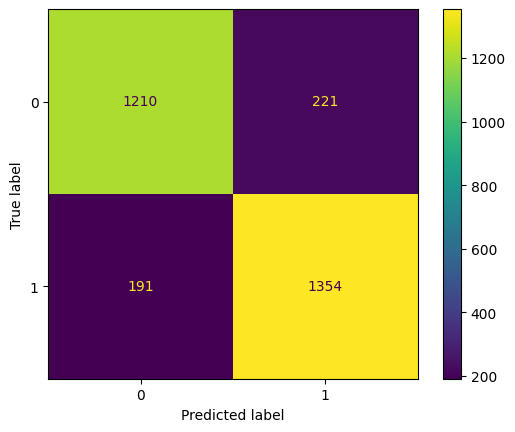

In [50]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train
disp = ConfusionMatrixDisplay(cm_train, display_labels=classification.classes_);
disp.plot()

## Confusion Matrix Test Set

[[430 187]
 [ 84 575]]


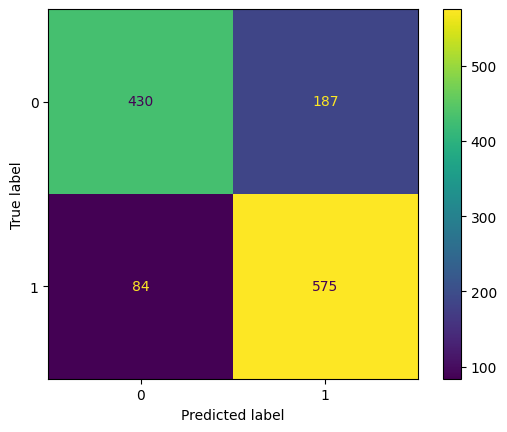

In [51]:
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()

## Confusion Matrix Validation Set

[[488 368]
 [109 858]]


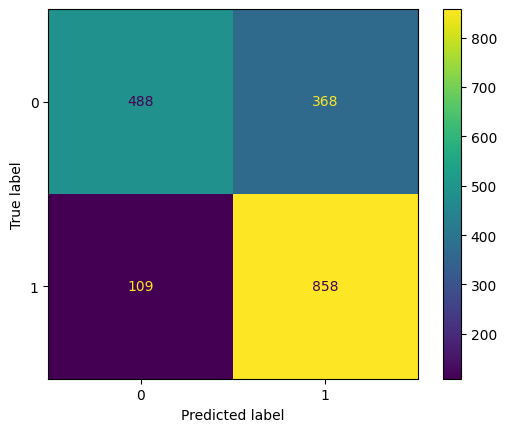

In [52]:
cm_test = confusion_matrix(y_val, y_val_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()

## Error Matrix

In [53]:
error_metric = pd.DataFrame({"Train":[accuracy_score(y_train, y_train_pred),f1_score(y_train,y_train_pred),
                                recall_score(y_train,y_train_pred),precision_score(y_train, y_train_pred),
                                cohen_kappa_score(y_train, y_train_pred)],
                                "Test":[accuracy_score(y_test, y_test_pred),f1_score(y_test,y_test_pred),
                                recall_score(y_test,  y_test_pred),precision_score(y_test, y_test_pred),
                                cohen_kappa_score(y_test, y_test_pred)],
                                "Val":[accuracy_score(y_val, y_val_pred),f1_score(y_val,y_val_pred),
                                recall_score(y_val,  y_val_pred),precision_score(y_val, y_val_pred),
                                cohen_kappa_score(y_val, y_val_pred)]},
                                index=["accuracy","F1","recall","precission","kappa"])

In [54]:
error_metric

,Train,Test,Val
accuracy,0.861559,0.787618,0.738343
F1,0.867949,0.809289,0.782490
recall,0.876375,0.872534,0.887280
precission,0.859683,0.754593,0.699837
kappa,0.722497,0.572500,0.465457


In [89]:
name = classification.feature_names_in_.tolist()
#name

In [98]:
coef = classification.coef_.tolist()[0]
coef = np.abs(coef)

In [103]:
pd.DataFrame({'name':name,'abs_coef':coef}).sort_values('abs_coef', ascending=False).head(10)

,name,abs_coef
10,rsi_3,6.731823
11,rsi_7,2.448773
57,pos_BBL_7_2.0,2.123223
55,pos_BBU_3_2.0,2.012944
50,pos_ema_3,2.005729
53,pos_BBL_3_2.0,1.936366
59,pos_BBU_7_2.0,1.837412
61,pos_BBL_14_2.0,1.454418
63,pos_BBU_14_2.0,1.274443
29,STOCHd_14_3_3,0.856982


# Export

In [55]:
today = date.today()
model_name = 'logistic_regression'

In [56]:
error_metric.to_csv('../data/error_metric_{}_{}.csv'.format(model_name,today))